# CONVNET example for CIFAR 100
Illustrates also conversion from class numbers to categorical 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load the CIFAR 100 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar100.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)

# Create the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


169017344/169001437 [==============================] - 3s 0us/step


2023-01-07 13:12:23.940284: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-07 13:12:25.188865: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10226 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6
2023-01-07 13:12:25.189619: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 5761 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:05:00.0, compute capability: 7.5
2023-01-07 13:12:26.034258: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exc

Epoch 1/10


2023-01-07 13:12:27.560740: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2023-01-07 13:12:29.840824: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 9s 3ms/step - loss: 4.0326 - accuracy: 0.0781 - val_loss: 3.6116 - val_accuracy: 0.1522
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.3809 - accuracy: 0.1860 - val_loss: 3.2064 - val_accuracy: 0.2151
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 3.0785 - accuracy: 0.2419 - val_loss: 3.0643 - val_accuracy: 0.2557
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.9070 - accuracy: 0.2750 - val_loss: 2.9336 - val_accuracy: 0.2730
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.7731 - accuracy: 0.3009 - val_loss: 2.8028 - val_accuracy: 0.3013
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.6699 - accuracy: 0.3216 - val_loss: 2.8113 - val_accuracy: 0.3009
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 2.5797 - accuracy: 0.3390 - val_loss: 2.6797 - val_accuracy: 0.3237
Epo

<AxesSubplot:>

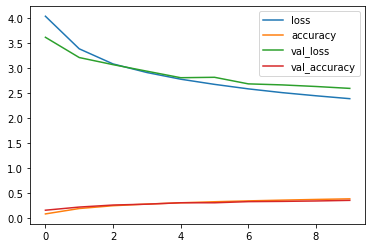

In [2]:
import pandas as pd
hist=pd.DataFrame(history.history)
hist.plot()

In [30]:
import numpy as np

# Convert the one-hot encoded labels back to the original class labels
labels = np.argmax(y_test, axis=1)

# Remove the single-dimensional entries from the shape of an array.
labels = np.squeeze(labels)


In [31]:
y_pred=model.predict(x_test)

In [32]:
labelsp = np.argmax(y_pred, axis=1)
labelsp = np.squeeze(labelsp)

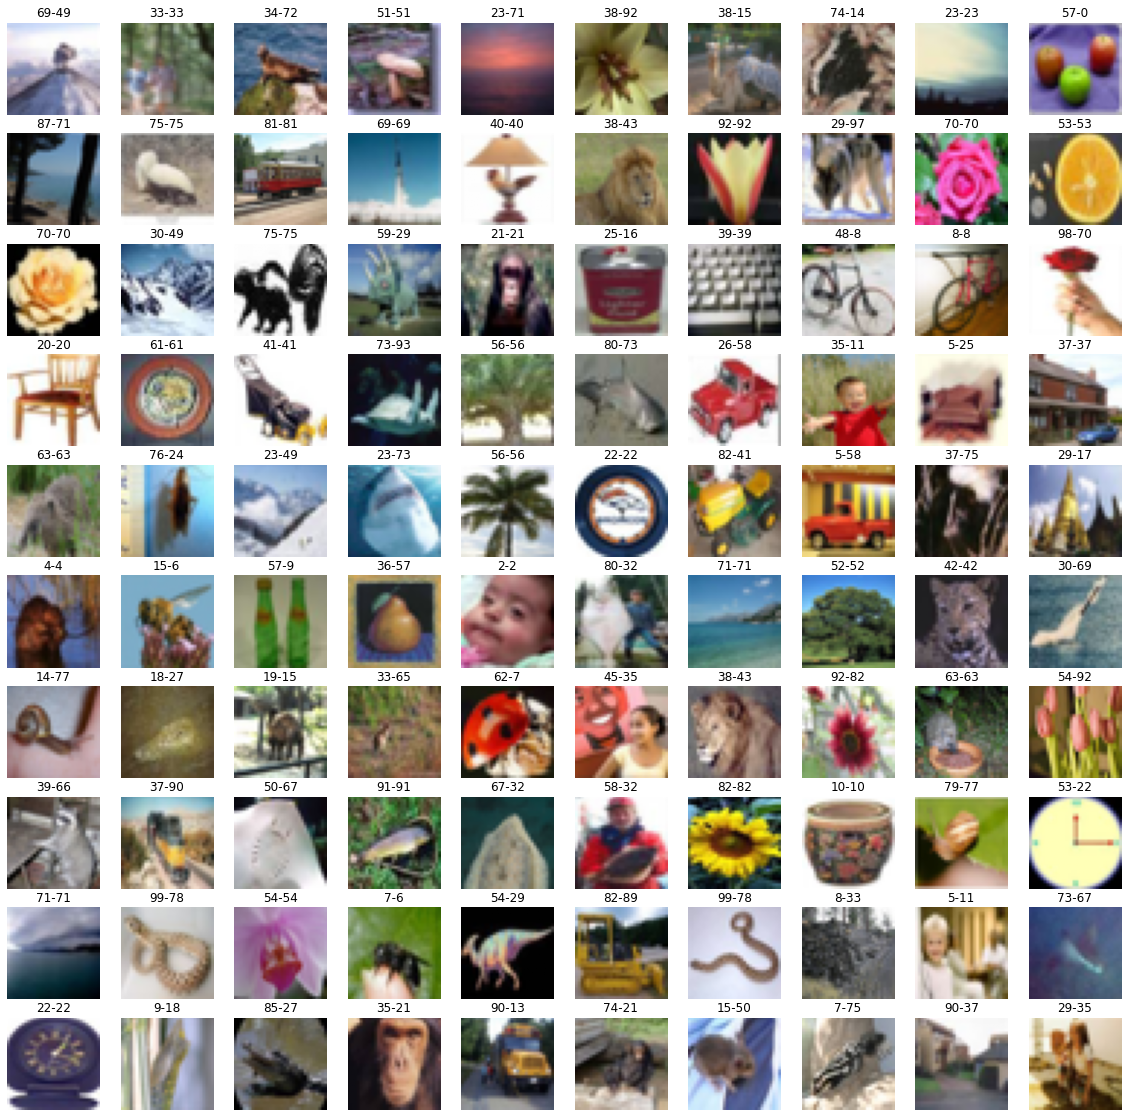

In [33]:
# Create a figure with 10 rows and 10 columns
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

# Loop through the subplots and plot an image in each subplot
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(x_test[i*10+j])
        axs[i, j].set_title(str(labelsp[i*10+j])+'-'+str(labels[i*10+j]))
        axs[i, j].axis('off')

# Show the plot
plt.show()